In [2]:
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import pgmpy
import scipy.stats

# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

%matplotlib inline

In [42]:
sale = pd.read_csv("datas/sales.csv", encoding="ANSI")
sale

,Timedate,View,Mom_code,Item_code,Name,Item_group,Price,Amount
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
...,...,...,...,...,...,...,...,...
38304,2020-01-01 0:20,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38305,2020-01-01 0:40,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38306,2020-01-01 1:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38307,2020-01-01 1:20,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,-,NaN


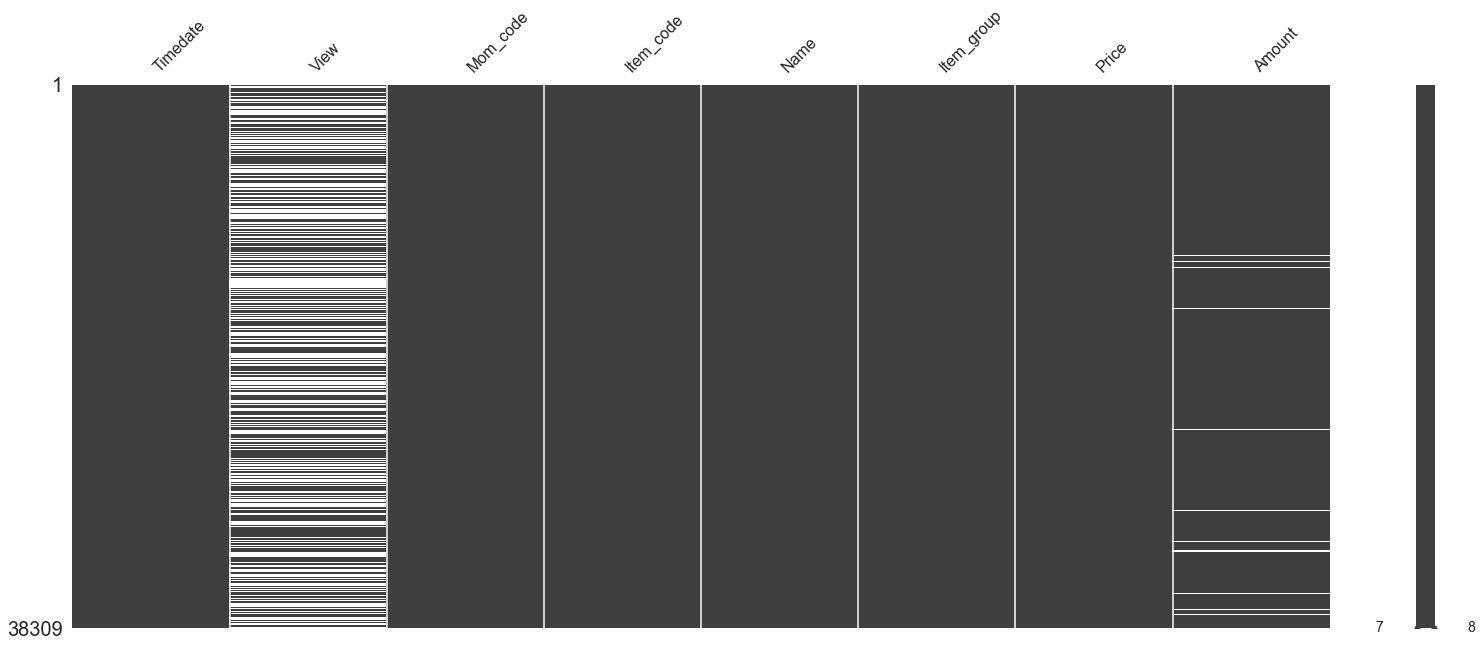

In [43]:
import missingno as msno

msno.matrix(sale)
plt.show()

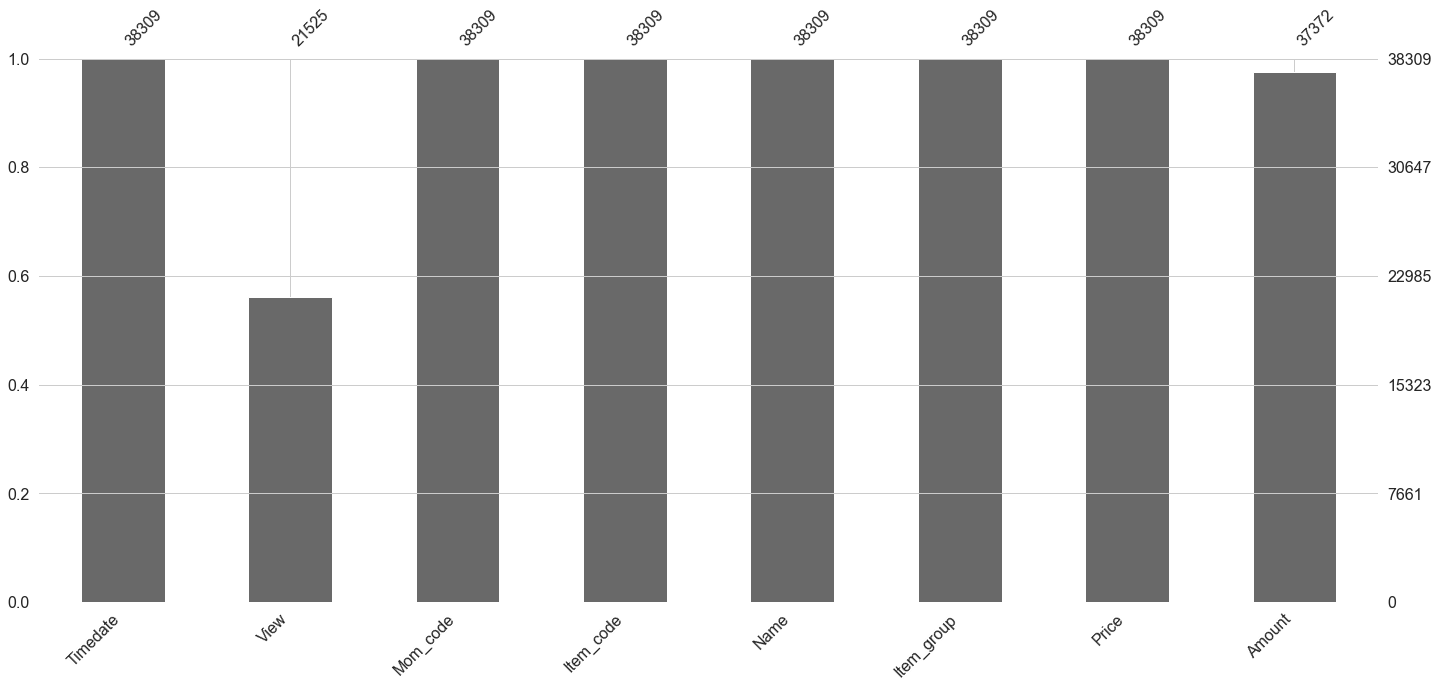

In [44]:
msno.bar(sale)
plt.show()

In [59]:
sale.dropna(subset=['Amount', 'Price'], inplace=True)

In [64]:
sale['Price']

0         39900 
1         39900 
2         39900 
3         39900 
4         39900 
          ...   
38299    148000 
38300    178000 
38301    168000 
38302    158000 
38303    148000 
Name: Price, Length: 37372, dtype: object

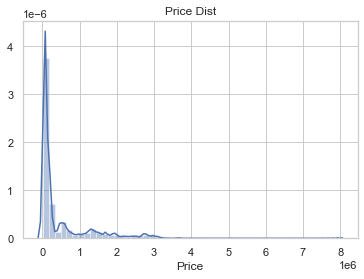

In [65]:
sns.distplot(sale.Price)
plt.title("Price Dist")
plt.show()

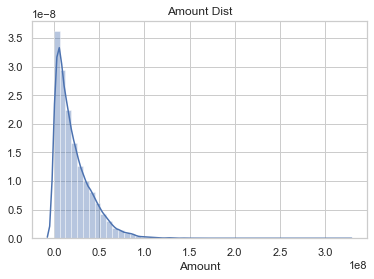

In [66]:
sns.distplot(sale.Amount)
plt.title("Amount Dist")
plt.show()

In [68]:
sale.groupby(sale.Mom_code).Amount.median()

Mom_code
100000    11983000.0
100001    38607500.0
100002    36441000.0
100006     8931500.0
100009    32271000.0
             ...    
100843    12386500.0
100844    35031000.0
100845     4590500.0
100846    12486500.0
100849    46506000.0
Name: Amount, Length: 687, dtype: float64

In [71]:
sale.groupby(sale.Item_group).Amount.median()

Item_group
가구       7372000.0
가전       9432000.0
건강기능    22828000.0
농수축     40595000.0
생활용품    12280000.0
속옷      20618000.0
의류      19684000.0
이미용     33554000.0
잡화      11829000.0
주방      13544000.0
침구       8974000.0
Name: Amount, dtype: float64

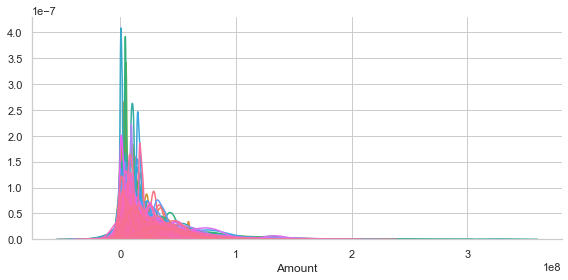

In [70]:
g = sns.FacetGrid(sale, hue="Mom_code", height=4, aspect=2)
g.map(sns.kdeplot, "Amount")
plt.show()

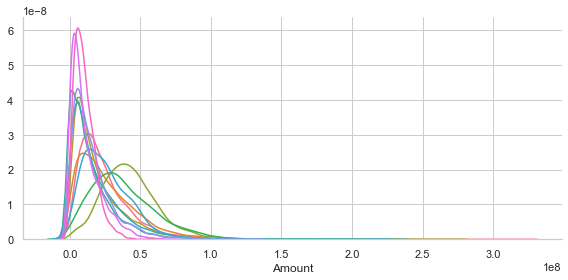

In [72]:
g = sns.FacetGrid(sale, hue="Item_group", height=4, aspect=2)
g.map(sns.kdeplot, "Amount")
plt.show()

In [74]:
from patsy import *
dmatrix("Item_group", sale)

DesignMatrix with shape (37372, 11)
  Columns:
    ['Intercept',
     'Item_group[T.가전]',
     'Item_group[T.건강기능]',
     'Item_group[T.농수축]',
     'Item_group[T.생활용품]',
     'Item_group[T.속옷]',
     'Item_group[T.의류]',
     'Item_group[T.이미용]',
     'Item_group[T.잡화]',
     'Item_group[T.주방]',
     'Item_group[T.침구]']
  Terms:
    'Intercept' (column 0), 'Item_group' (columns 1:11)
  (to view full data, use np.asarray(this_obj))

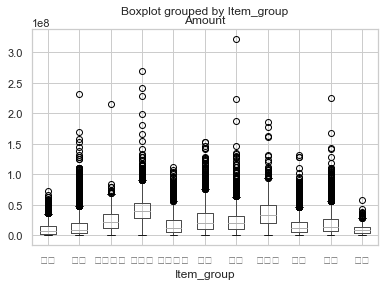

In [76]:
sale.boxplot("Amount", "Item_group")
plt.show()

In [81]:
model = sm.OLS.from_formula("Amount ~ C(Item_group) + 0", sale)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     933.7
Date:                Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:21:50   Log-Likelihood:            -6.7749e+05
No. Observations:               37372   AIC:                         1.355e+06
Df Residuals:                   37361   BIC:                         1.355e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Item_group)[가구]    1.114e+07   3

In [82]:
sale.describe().iloc[[3, 7], :]

,View,Mom_code,Item_code,Amount
min,2.0,100000.0,200000.0,0.0
max,40.0,100849.0,202513.0,322009000.0


In [89]:
sale = pd.DataFrame(sale)
sale

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [86]:
feature_names = list(sale.feature_names)
feature_names.remove(["Item_code","View","Mom_code"])
feature_names = ["scale({})".format(name) for name in feature_names] + ["Item_group"]
model3 = sm.OLS.from_formula("Amount ~ " + "+".join(feature_names), data=sale)
result3 = model3.fit()
print(result3.summary())

AttributeError: 'DataFrame' object has no attribute 'feature_names'